This project aims to predict future stock prices using advanced analytical methods. The endogenous variable is the APPL stock price, while the exogenous variables includes varios economic factor such as GDP, unemployement rate, Maturity Yield of US treasury Bond, Personal Saving Rate USA and market indicators like Mircosoft, Samsung and S&P500 Stock Price. The approach involves:

Regression Models: To establish predictive relationships between the stock price and other variables.

Principal Component Analysis (PCA): To reduce dimensionality and identify key components.

Factor Analysis: To uncover underlying factors influencing the stock price.

Correlation Analysis: To assess the strength and direction of relationships among variables.

Multicollinearity Checks: To evaluate and address the intercorrelations among predictors.

These methodologies will be employed to develop a robust model for forecasting future stock prices based on comprehensive data analysis.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
def datas(filename):
    df = pd.read_csv(filename)
    df.set_index("Date", inplace=True)
    return df

df = datas("Datasets/Historical Data - 2000-2024.csv")
df.head()

,Samsung,Apple,Microsoft,SnP500,Personal_Saving,Maturity_Yield,UR_Rate
Date,,,,,,,
1/1/2000,4.3800,0.926339,48.93750,1394.5,324.2,6.862500,4.0
2/1/2000,3.7376,1.023438,44.68750,1366.4,289.4,6.539000,4.1
3/1/2000,4.8910,1.212612,53.12500,1498.6,276.5,6.380435,4.0
4/1/2000,4.3800,1.107701,34.87500,1452.4,311.7,6.184737,3.8
5/1/2000,4.4968,0.750000,31.28125,1420.6,314.7,6.548182,4.0


In [84]:
GDP = datas("Datasets/GDP.csv")
GDP.head()

,GDP
Date,
1/1/2000,10002.179
4/1/2000,10247.720
7/1/2000,10318.165
10/1/2000,10435.744
1/1/2001,10470.231


Linear Interpolation of the GDP of NAN Values

$y = y_0 + \frac{(x - x_0) \cdot (y_1 - y_0)}{x_1 - x_0}$


$y$ is the interpolated value at $x$. 

$x_0$ and $x_1$ are the known x-values. 

$y_0$ and $y_1$ are the known y-values corresponding to $x_0$ and $x_1$

In [85]:
df = pd.concat([df, GDP], axis = 1)

df['GDP'] = df['GDP'].interpolate(method='linear', limit_direction='both')
df.head()

,Samsung,Apple,Microsoft,SnP500,Personal_Saving,Maturity_Yield,UR_Rate,GDP
Date,,,,,,,,
1/1/2000,4.3800,0.926339,48.93750,1394.5,324.2,6.862500,4.0,10002.179000
2/1/2000,3.7376,1.023438,44.68750,1366.4,289.4,6.539000,4.1,10084.026000
3/1/2000,4.8910,1.212612,53.12500,1498.6,276.5,6.380435,4.0,10165.873000
4/1/2000,4.3800,1.107701,34.87500,1452.4,311.7,6.184737,3.8,10247.720000
5/1/2000,4.4968,0.750000,31.28125,1420.6,314.7,6.548182,4.0,10271.201667


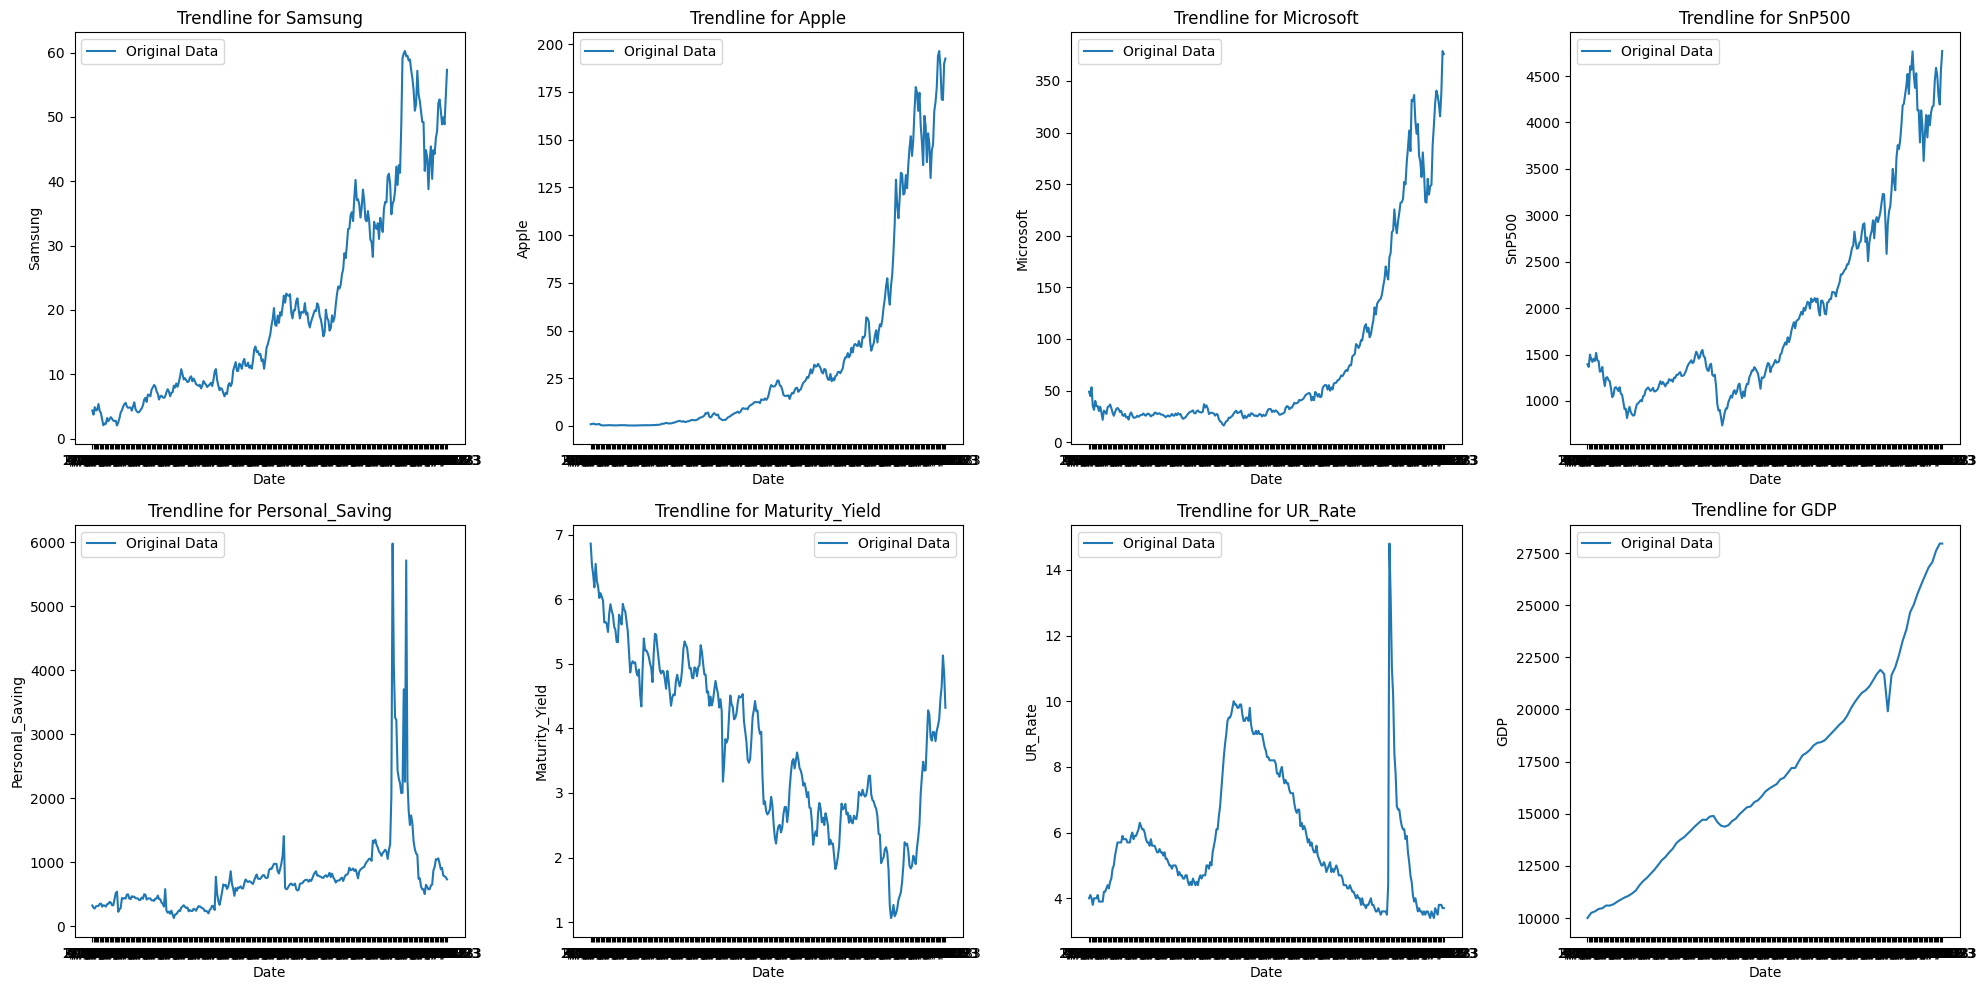

In [86]:
num_columns = len(df.columns)
num_plots_per_row = 4
num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.lineplot(ax=axes[i], x=df.index, y=df[column], label='Original Data')
    axes[i].set_title(f'Trendline for {column}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(column)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [87]:
df = df.pct_change()
df = df.dropna()
df.head()

,Samsung,Apple,Microsoft,SnP500,Personal_Saving,Maturity_Yield,UR_Rate,GDP
Date,,,,,,,,
2/1/2000,-0.146667,0.104820,-0.086845,-0.020151,-0.107341,-0.047140,0.025000,0.008183
3/1/2000,0.308594,0.184842,0.188811,0.096751,-0.044575,-0.024249,-0.024390,0.008117
4/1/2000,-0.104478,-0.086517,-0.343529,-0.030829,0.127306,-0.030672,-0.050000,0.008051
5/1/2000,0.026667,-0.322922,-0.103047,-0.021895,0.009625,0.058765,0.052632,0.002291
6/1/2000,0.198052,0.247024,0.278721,0.023934,0.013346,-0.040539,0.000000,0.002286


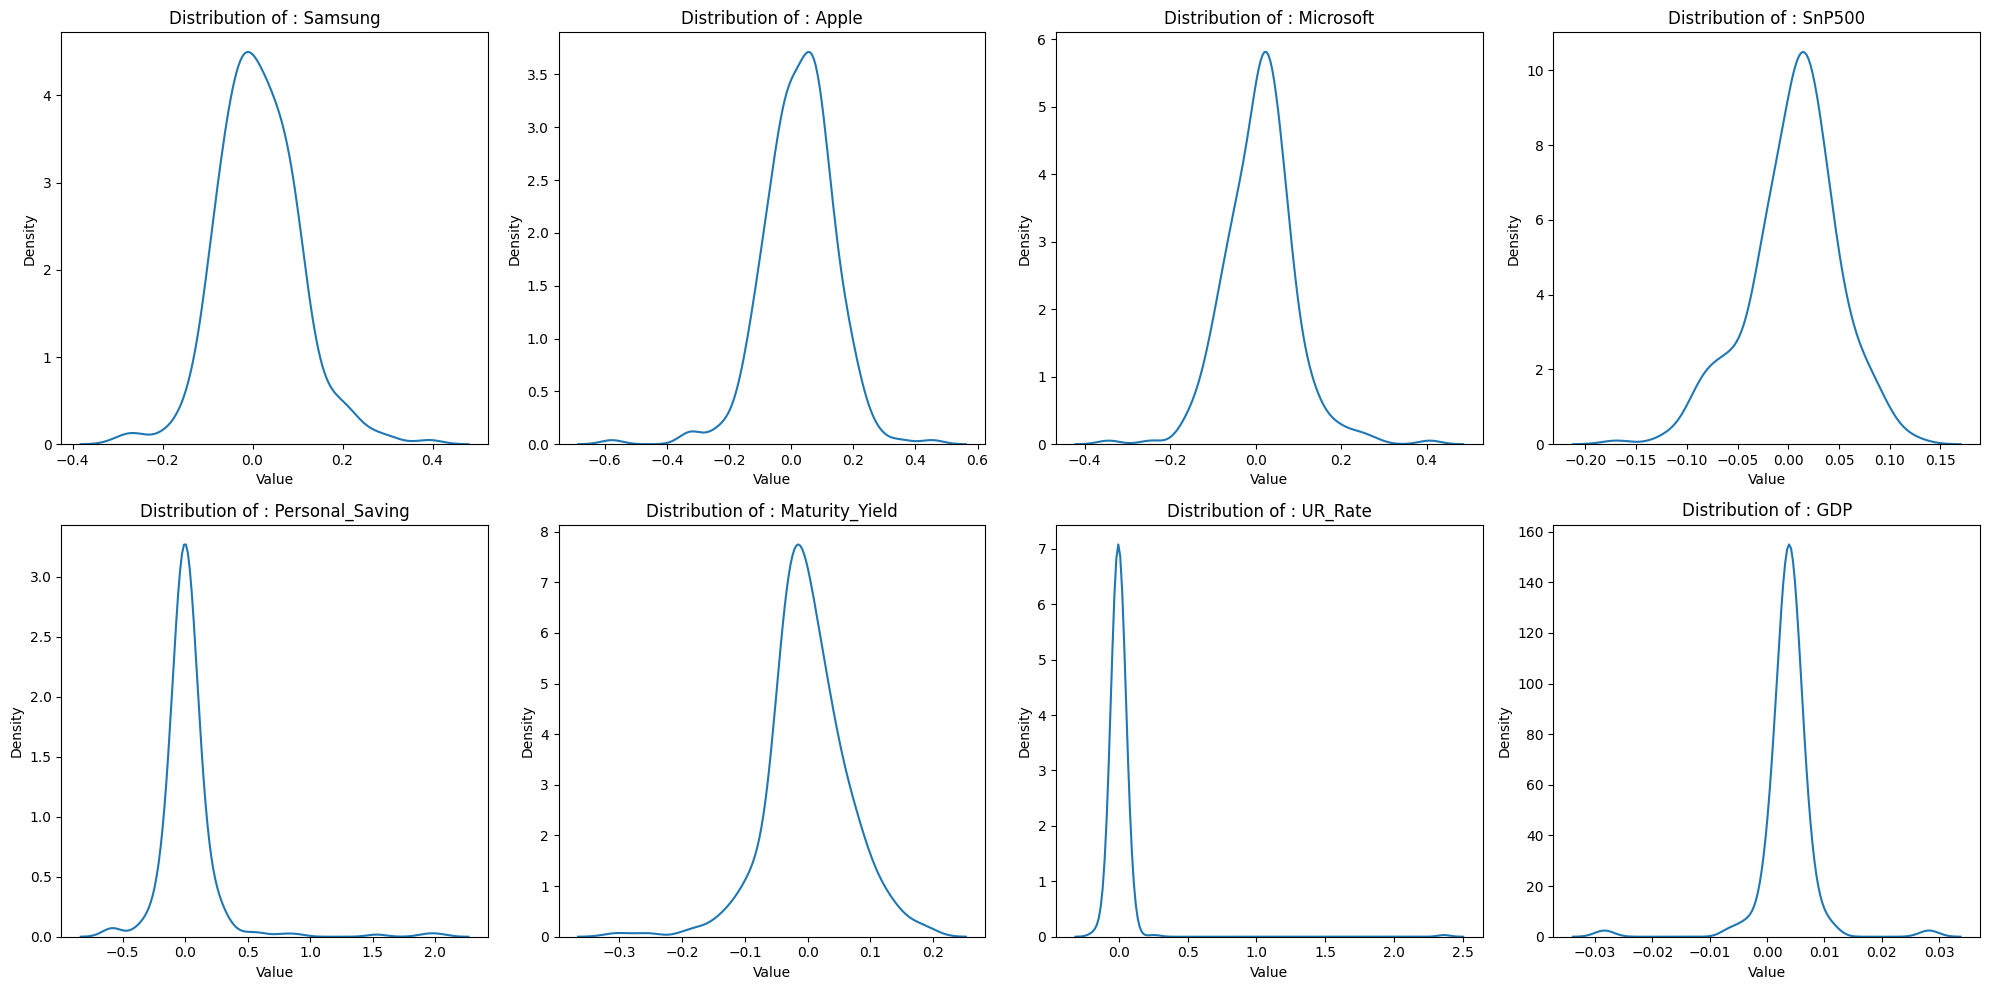

In [88]:
num_columns = len(df.columns)
num_plot_per_row = 4
num_rows = (num_columns + num_plot_per_row -1) // num_plot_per_row
fig, axes = plt.subplots(num_rows, num_plot_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    sns.kdeplot(df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of : {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
plt.tight_layout()
plt.show()

The Yeo-Johnson transformation is defined as:

For x ≥ 0: Y(λ) = [(x + 1)^λ - 1] / λ, if λ ≠ 0 

Y(λ) = log(x + 1), if λ = 0

For x < 0: Y(λ) = -[(-x + 1)^(2-λ) - 1] / (2 - λ), if λ ≠ 2 

Y(λ) = -log(-x + 1), if λ = 2

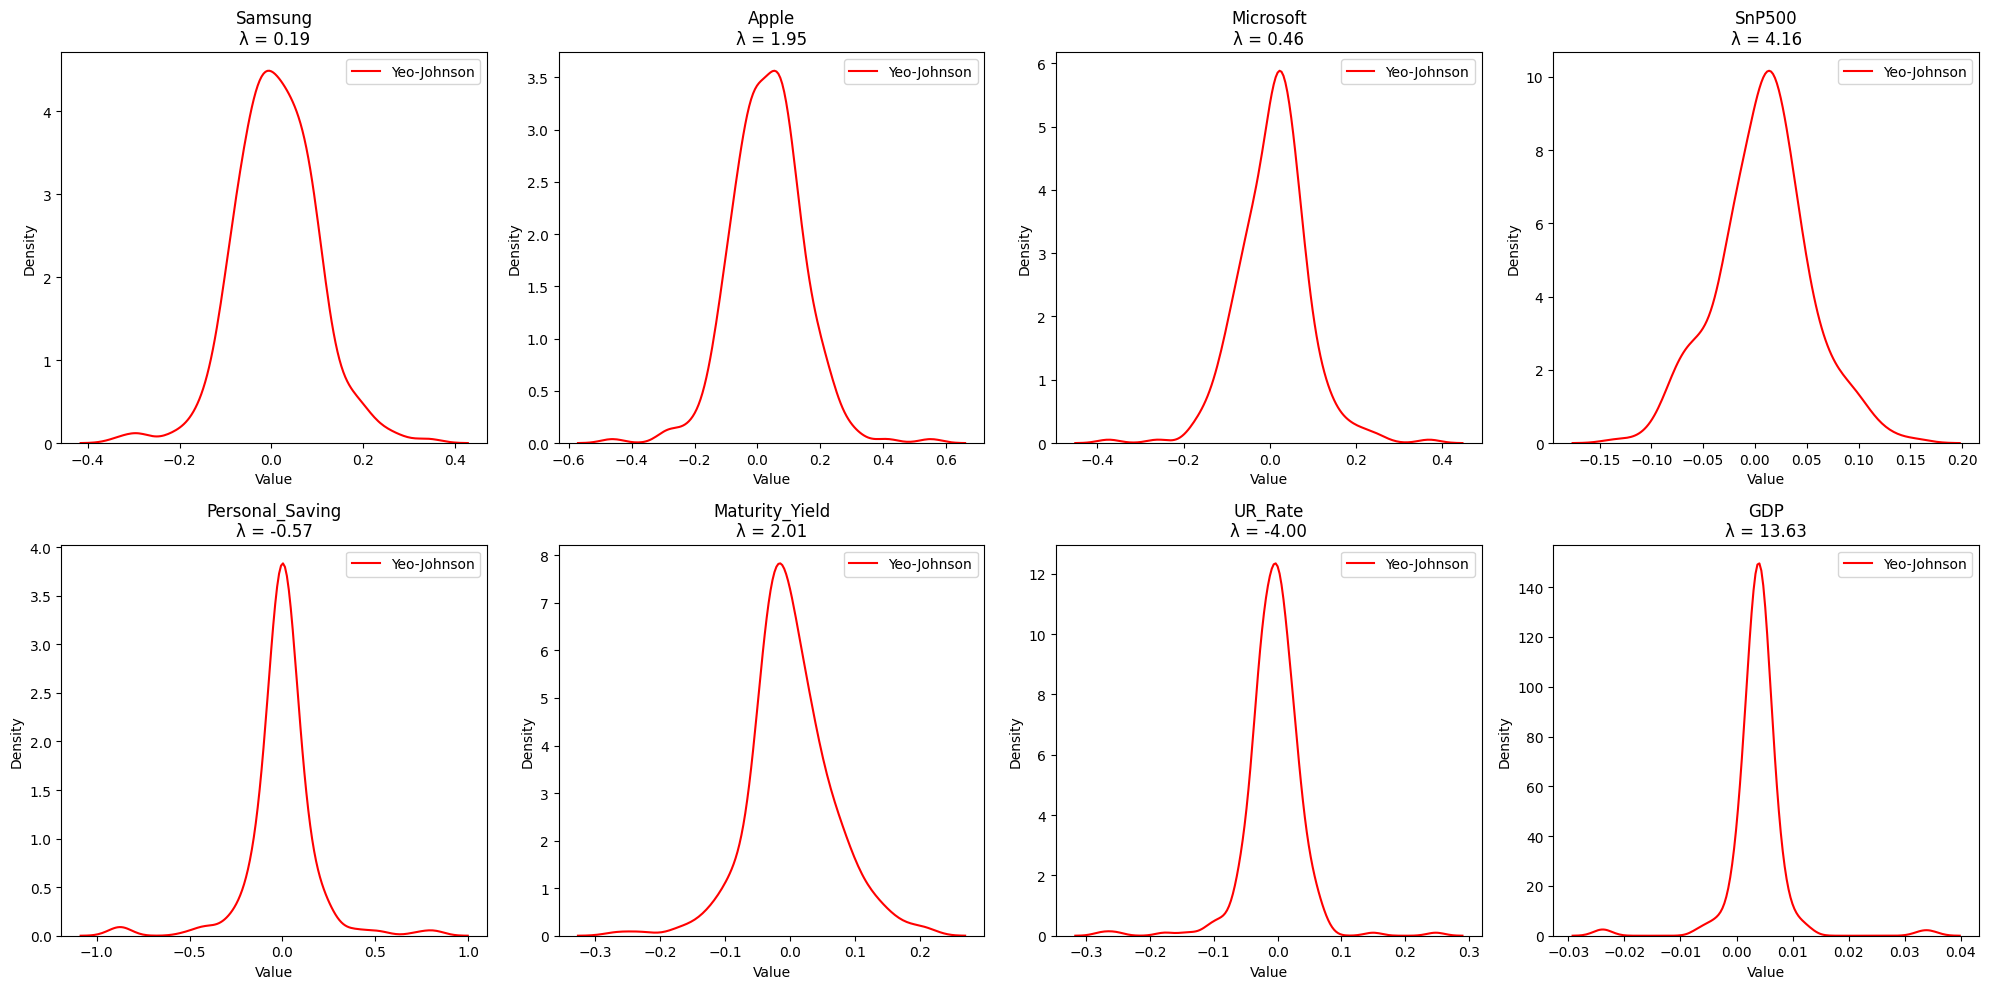

In [89]:
#Yeo-Johnson transformation - To make distribution normal
from scipy import stats

num_cols = len(df.columns)
num_plot_per_rows = 4
num_rows = (num_cols + num_plot_per_row - 1) // num_plot_per_row
fig, axes = plt.subplots(num_rows, num_plot_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    transformed_data, lambda_param = stats.yeojohnson(df[column])
    sns.kdeplot(transformed_data, ax=axes[i], color='red', label='Yeo-Johnson')
    axes[i].set_title(f'{column}\nλ = {lambda_param:.2f}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()
plt.tight_layout()
plt.show()

In [90]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(df)
df = pd.DataFrame(transformed_data, index = df.index, columns=df.columns)

print("\nTransformed Data:")
df


Transformed Data:


,Samsung,Apple,Microsoft,SnP500,Personal_Saving,Maturity_Yield,UR_Rate,GDP
Date,,,,,,,,
2/1/2000,-1.858150,0.694990,-1.218410,-0.627130,-0.627651,-0.766941,0.694492,0.965976
3/1/2000,2.992444,1.498862,2.140326,2.340601,-0.236799,-0.417293,-0.451142,0.951125
4/1/2000,-1.335701,-1.012163,-4.778911,-0.848714,0.662582,-0.516185,-1.163872,0.936524
5/1/2000,0.185933,-2.768587,-1.430945,-0.663824,0.072416,0.919620,1.224216,-0.304437
6/1/2000,1.956769,2.160233,3.143232,0.369884,0.092710,-0.666907,0.149659,-0.305525
...,...,...,...,...,...,...,...,...
8/1/2023,-0.586097,-0.655475,-0.413886,-0.575589,0.134057,1.176810,1.773526,0.094255
9/1/2023,0.139109,-1.029806,-0.570693,-1.204139,-0.774485,0.675214,0.149659,0.090540
10/1/2023,-0.359742,-0.299951,0.759823,-0.665605,-0.055742,1.666892,0.149659,0.086856


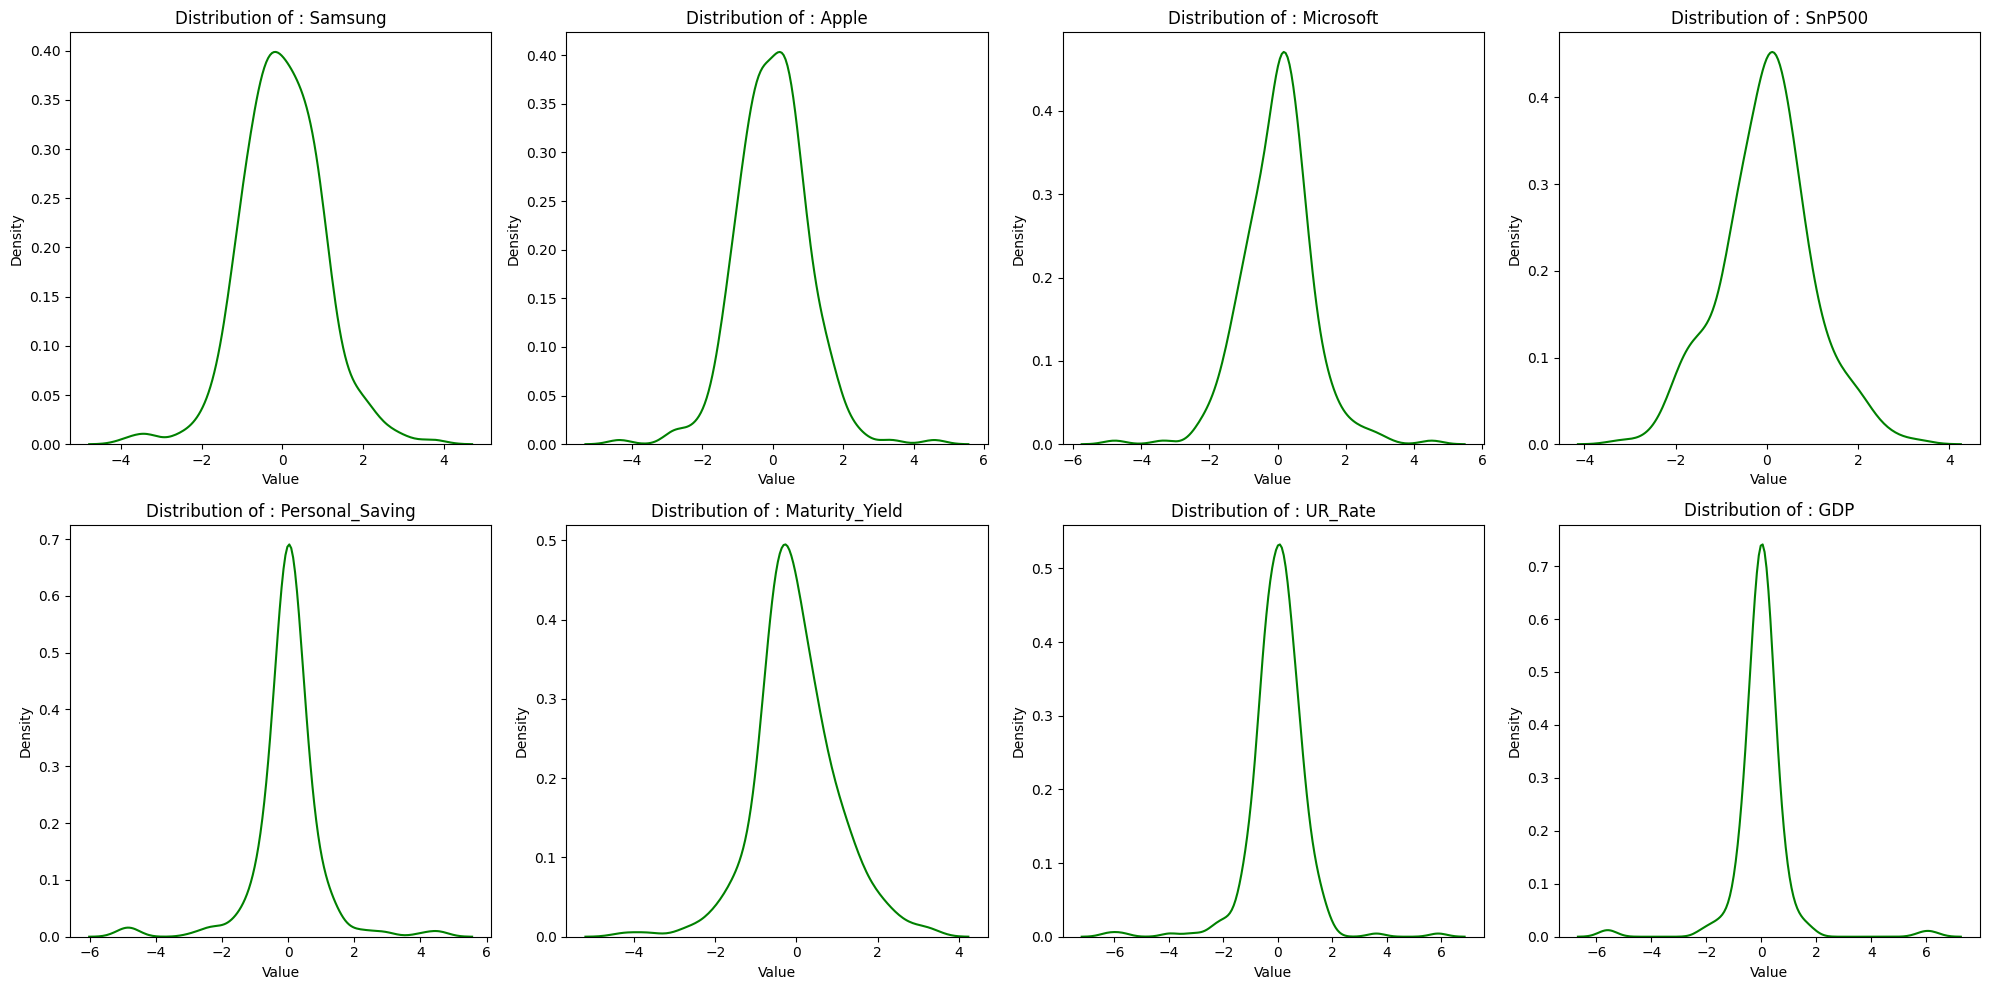

In [109]:
num_columns = len(df.columns)
num_plot_per_row = 4
num_rows = (num_columns + num_plot_per_row -1) // num_plot_per_row
fig, axes = plt.subplots(num_rows, num_plot_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    sns.kdeplot(df[column], ax=axes[i], color='Green', label='Yeo Johnson Transformation')
    axes[i].set_title(f'Distribution of : {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
plt.tight_layout()
plt.show()

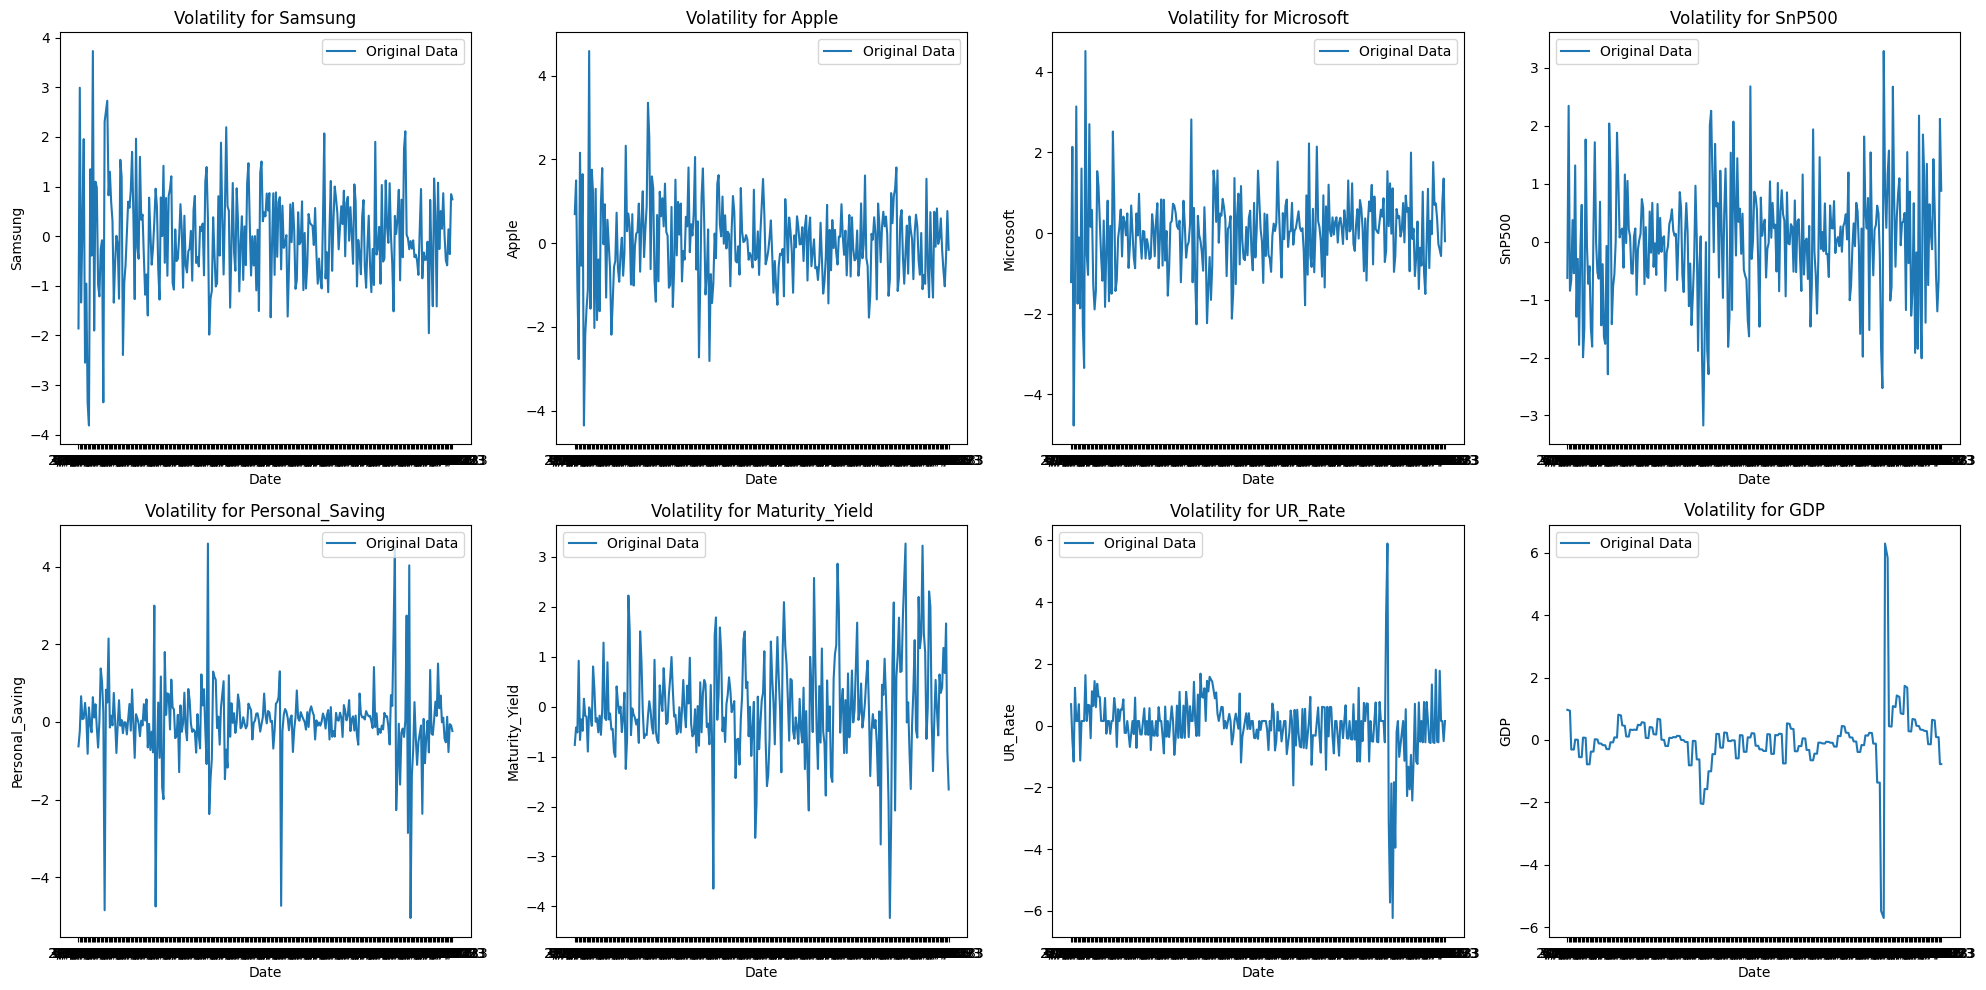

In [91]:
num_columns = len(df.columns)
num_plots_per_row = 4
num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.lineplot(ax=axes[i], x=df.index, y=df[column], label='Original Data')
    axes[i].set_title(f'Volatility for {column}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(column)
    axes[i].legend()

plt.tight_layout()
plt.show()

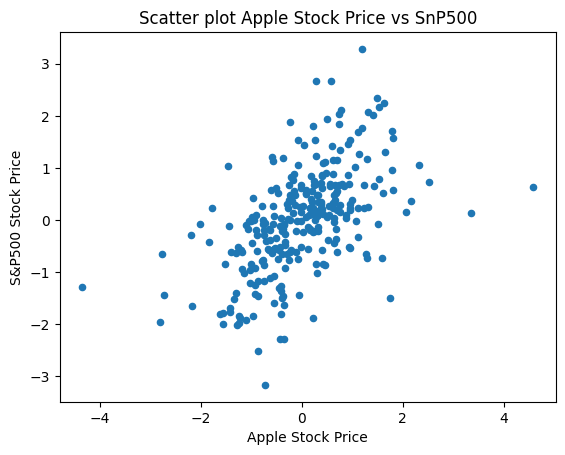

In [92]:
scatt = df.plot.scatter(
    x = 'Apple',
    y = 'SnP500',
    title = 'Scatter plot Apple Stock Price vs SnP500'
)
scatt.set(xlabel="Apple Stock Price", ylabel="S&P500 Stock Price")
plt.show()

In [93]:
def corr(x, y, **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = r"$\rho$ = " + str(round(coef, 2))
    ax = plt.gca()
    ax.annotate(label, xy=(0.3, 0.15), size=20, xycoords=ax.transAxes)

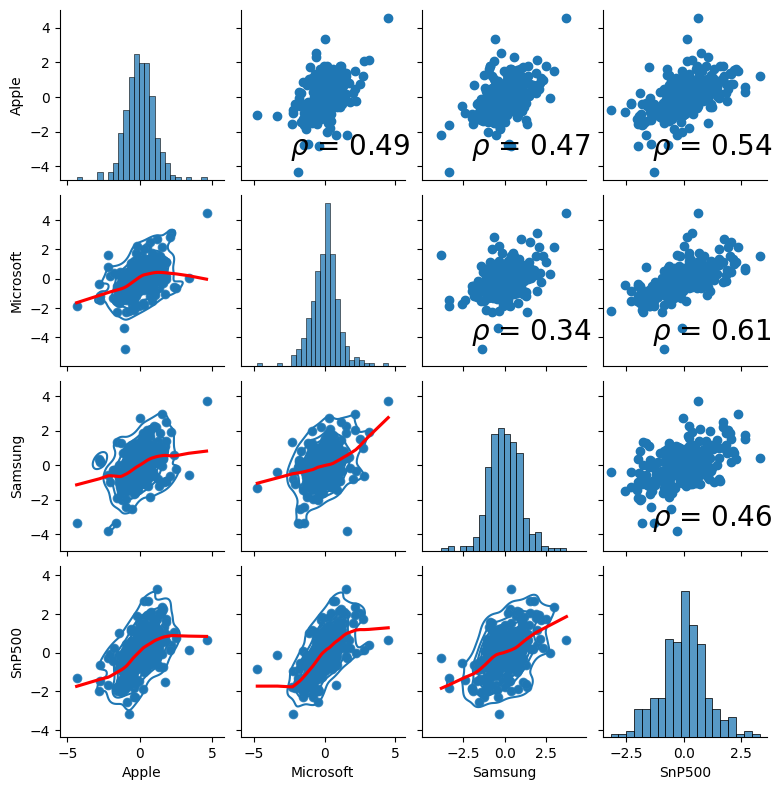

In [94]:
grid = sns.pairplot(df, vars = ['Apple', 'Microsoft', 'Samsung', 'SnP500'], height=2)
grid = grid.map_upper(plt.scatter)
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot)
grid = grid.map_lower(sns.regplot, lowess=True, line_kws={"color": "red"})

In [95]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

result = smf.ols(
    "Apple ~ Samsung + Microsoft + SnP500", data = df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Apple   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     59.14
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           1.04e-29
Time:                        14:07:38   Log-Likelihood:                -337.40
No. Observations:                 287   AIC:                             682.8
Df Residuals:                     283   BIC:                             697.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.158e-17      0.047  -1.32e-15      1.000      -0.092       0.092
Samsung        0.2596      0.053      4.926      0.000       0.156       0.363
Microsoft      0.2190      0.059      3.707      0.000       0.103       0.335
SnP500         0.2901      0.062      4.643      0.000       0.167       0.413
==============================================================================
Omnibus:                       21.290   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.948
Skew:                           0.285   Prob(JB):                     1.17e-12
Kurtosis:                       5.067   Cond. No.                         2.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value of 0.385 indicates that approximately 38.5% of the variance in the Apple stock price can be explained by the combined effects of the independent variables (Samsung, Microsoft, and S&P 500 stock prices). While this suggests that the model does capture some of the relationship between these variables and the Apple stock price, a large proportion of the variance (about 61.6%) remains unexplained, implying that there may be other factors influencing the Apple stock price that are not included in the model.

The Adjusted R-squared of 0.379 adjusts the R-squared value for the number of predictors in the model. This slight reduction from the R-squared value suggests that, while the model explains a moderate proportion of the variance in the Apple stock price, the inclusion of multiple predictors does not add substantial explanatory power. The adjusted value provides a more accurate measure of model performance, particularly when comparing models with different numbers of predictors.

The F-statistic of 59.14 is a measure of the overall significance of the regression model. It tests whether at least one of the predictors is significantly related to the dependent variable. Given the very low Prob (F-statistic) of 1.04e-29, which is effectively zero, we can confidently reject the null hypothesis that all coefficients are zero. This suggests that the model is statistically significant and that the predictors collectively have a significant impact on the Apple stock price, even though the overall explanatory power of the model is moderate.

$R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}$

Adjusted $\bar{R}^2 = 1 - \left( \frac{\text{SS}_{\text{res}} / (n - k - 1)}{\text{SS}_{\text{tot}} / (n - 1)} \right)$

Samsung: The coefficient for Samsung is 0.2190, with a standard error of 0.053. The t-value is 4.926 and the p-value is 0.000, indicating that the coefficient for Samsung is statistically significant. The 95% confidence interval for the Samsung coefficient ranges from 0.156 to 0.363, suggesting a positive and significant effect on Apple stock returns. This implies that for every 1 unit increase in Samsung's stock price, Apple’s stock price is expected to increase by approximately 0.2596 units, holding all other variables constant.

Microsoft: The coefficient for Microsoft is 0.2190, with a standard error of 0.059. The t-value is 3.396 and the p-value is 0.000, indicating that Microsoft’s stock price also has a statistically significant effect on Apple’s stock returns. The 95% confidence interval for the Microsoft coefficient ranges from 0.103 to 0.335, reflecting a strong and positive influence on Apple’s stock returns. This suggests that a 1 unit increase in Microsoft’s stock price is associated with a 0.2190 unit increase in Apple’s stock price, assuming other factors remain constant.

SnP500: The coefficient for S&P 500 is 0.2901, with a standard error of 0.062. The t-value is 4.643 and the p-value is 0.000, indicating that the S&P 500 index has a statistically significant impact on Apple stock returns. The 95% confidence interval for the S&P 500 coefficient ranges from 0.167 to 0.413, suggesting a strong and positive effect. This implies that for every 1 unit increase in the S&P 500 index, Apple’s stock price is expected to increase by approximately 0.2901 units, all else being equal.

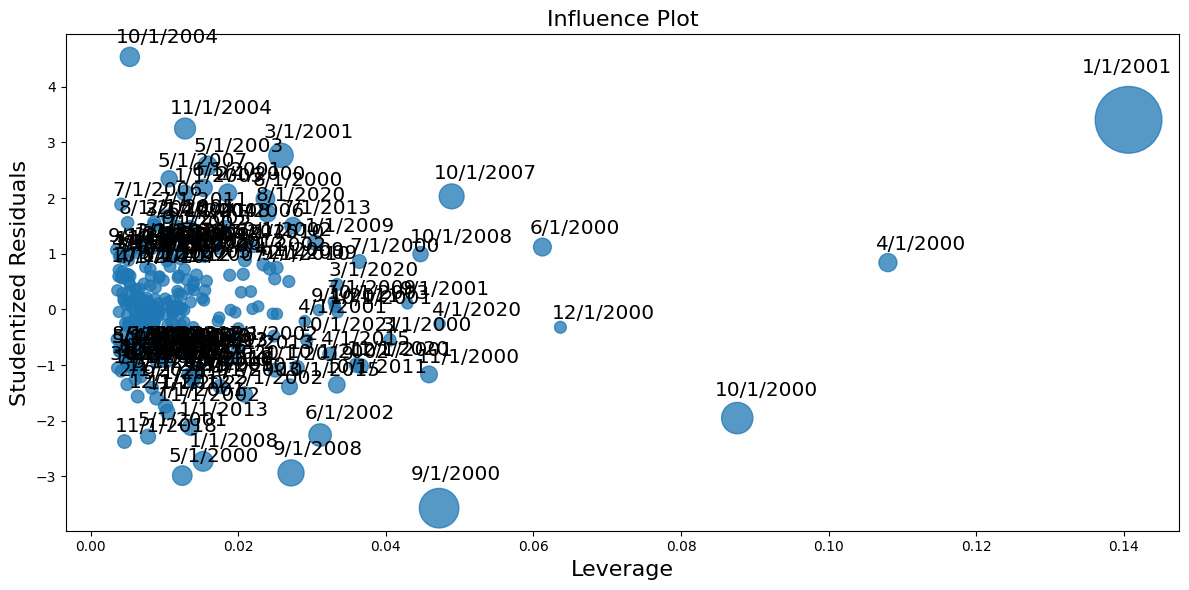

In [96]:
fig = sm.graphics.influence_plot(result, criterion='cook', alpha=0.5)
fig.set_size_inches(12, 6)
fig.tight_layout()
plt.show()

In [97]:
influence = result.get_influence()
inf_sum = influence.summary_frame().sort_values("cooks_d", ascending=False)
inf_sum.head(30)

,dfb_Intercept,dfb_Samsung,dfb_Microsoft,dfb_SnP500,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
Date,,,,,,,,,,
1/1/2001,0.216878,0.743296,1.061247,-0.798301,0.457441,3.343971,0.140622,1.352688,3.406027,1.377790
9/1/2000,-0.215947,0.648551,0.235568,-0.178858,0.151706,-3.499039,0.047223,-0.778988,-3.570950,-0.794998
10/1/2000,-0.120649,0.525676,-0.317070,0.005774,0.090600,-1.942710,0.087610,-0.601998,-1.952336,-0.604981
9/1/2008,-0.175810,-0.239844,-0.159270,0.442975,0.058657,-2.898862,0.027162,-0.484385,-2.937680,-0.490872
10/1/2007,0.122924,-0.131871,0.433436,-0.184925,0.052459,2.019776,0.048920,0.458076,2.030896,0.460598
3/1/2001,0.165527,0.336840,-0.055977,-0.283178,0.049564,2.735787,0.025805,0.445258,2.767795,0.450467
6/1/2002,-0.135389,-0.005158,-0.307446,0.345640,0.040321,-2.241511,0.031102,-0.401604,-2.257678,-0.404500
11/1/2004,0.193076,-0.102520,-0.252978,0.291182,0.033128,3.196349,0.012804,0.364023,3.249898,0.370122
1/1/2008,-0.162365,-0.174207,0.077674,0.197339,0.028205,-2.699000,0.015251,-0.335888,-2.729587,-0.339695


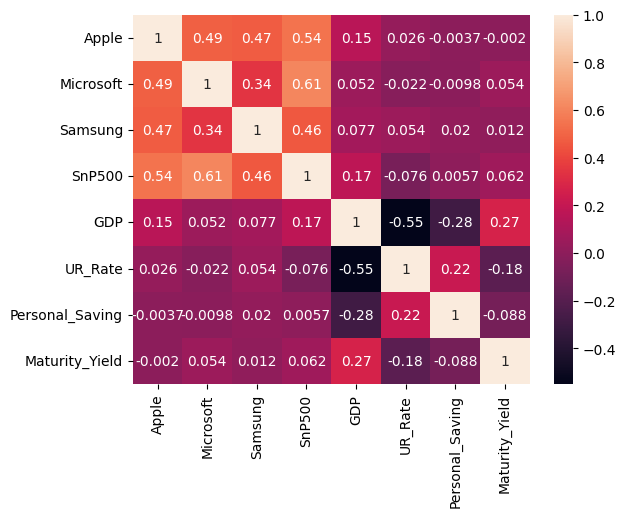

In [98]:
data = df[[
    'Apple',
    'Microsoft',
    'Samsung',
    'SnP500',
    'GDP',
    'UR_Rate',
    'Personal_Saving',
    'Maturity_Yield'
]]
c = data.corr()
sns.heatmap(c, annot= True)
plt.show()

In [99]:
result = smf.ols(
    "Apple ~ Microsoft + Samsung + SnP500 + GDP + UR_Rate + Personal_Saving + Maturity_Yield", data=df
).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Apple   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     26.88
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           4.44e-28
Time:                        14:07:41   Log-Likelihood:                -333.26
No. Observations:                 287   AIC:                             682.5
Df Residuals:                     279   BIC:                             711.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6.158e-17      0.046  -1.33e-15      1.000      -0.091       0.091
Microsoft           0.2310      0.059      3.923      0.000       0.115       0.347
Samsung             0.2454      0.053      4.656      0.000       0.142       0.349
SnP500              0.2742      0.063      4.348      0.000       0.150       0.398
GDP                 0.1541      0.059      2.621      0.009       0.038       0.270
UR_Rate             0.1122      0.056      2.004      0.046       0.002       0.222
Personal_Saving     0.0067      0.049      0.137      0.891      -0.089       0.102
Maturity_Yield     -0.0546      0.048     -1.135      0.257      -0.149       0.040
==============================================================================
Omnibus:                       19.335   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.767
Skew:                           0.277   Prob(JB):                     1.15e-10
Kurtosis:                       4.876   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value of 0.403 indicates that approximately 40.3% of the variance in Apple stock returns can be explained by the combined effects of the macroeconomic indicators and market indicators included in the model. This means that while the model does explain a significant portion of the variability in Apple stock returns, more than 60% of the variance remains unexplained, suggesting that other factors not included in the model may also play a substantial role in influencing Apple stock returns.

The Adjusted R-squared of 0.388 accounts for the number of predictors in the model, providing a more accurate measure of model performance, especially when multiple variables are included. The slight decrease from the R-squared value suggests that while the additional macroeconomic indicators do contribute to explaining the variance in Apple stock returns, their contribution may not be as strong as the previously included market indicators alone.

The F-statistic of 26.88 is a measure of the overall significance of the regression model. It tests whether at least one of the predictors is significantly related to Apple stock returns. Given the very low Prob (F-statistic) of 4.44e-28, which is effectively zero, we can confidently reject the null hypothesis that all coefficients are zero. This indicates that the model is statistically significant, and the combination of macroeconomic and market indicators collectively has a significant impact on Apple stock returns, even though the overall explanatory power of the model is moderate.

GDP: The coefficient for GDP is 0.1541 with a standard error of 0.059. The t-value is 2.621, and the p-value is 0.009, which is below the significance threshold of 0.05, indicating a statistically significant impact. The 95% confidence interval ranges from 0.038 to 0.270, suggesting that higher GDP is associated with an increase in the dependent variable. Specifically, a 1 unit increase in GDP is expected to increase the dependent variable by 0.1541 units, all else being equal.

Unemployment Rate (UR_Rate): The coefficient for the Unemployment Rate is 0.1122 with a standard error of 0.056. The t-value is 2.004, and the p-value is 0.046, just below the common significance threshold of 0.05, indicating a statistically significant impact. The 95% confidence interval ranges from 0.002 to 0.222, suggesting that an increase in the unemployment rate is positively associated with the dependent variable. Specifically, a 1 unit increase in the Unemployment Rate is expected to increase the dependent variable by 0.1122 units, all else being equal.

Personal Saving Rate (Personal_Saving): The coefficient for the Personal Saving Rate is 0.0067 with a standard error of 0.049. The t-value is 0.137, and the p-value is 0.891, indicating no statistically significant effect on the dependent variable. The 95% confidence interval ranges from -0.089 to 0.102, suggesting that the Personal Saving Rate does not have a significant influence on the dependent variable.

Maturity Yield (Maturity_Yield): The coefficient for Maturity Yield is -0.0546 with a standard error of 0.048. The t-value is -1.135, and the p-value is 0.257, indicating that the Maturity Yield does not have a statistically significant impact on the dependent variable. The 95% confidence interval ranges from -0.149 to 0.040, suggesting that the effect of Maturity Yield could be slightly negative or positive, but it is not statistically significant in this model.

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = [
    'Intercepts',
    'Microsoft',
    'Samsung',
    'SnP500',
    'GDP',
    'UR_Rate',
    'Personal_Saving',
    'Maturity_Yield',
]

var = result.model.exog
vif = [variance_inflation_factor(var, i) for i in range(var.shape[1])]
pd.DataFrame(vif[1:], data[1:], columns=['VIF'])

,VIF
Microsoft,1.619974
Samsung,1.297500
SnP500,1.858416
GDP,1.613629
UR_Rate,1.464549
Personal_Saving,1.099260
Maturity_Yield,1.081844


Overall, the VIF values are generally low, indicating that multicollinearity is not a significant issue among the variables in this model. Values above 5 or 10 might signal problematic multicollinearity, but all the VIF values here are well below these thresholds, suggesting that the variables are reasonably independent of each other.

In [101]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

pc = df[[
    'Microsoft',
    'Samsung',
    'SnP500',
    'GDP',
    'UR_Rate',
    'Personal_Saving',
    'Maturity_Yield',
]]

pca_data = preprocessing.scale(pc)
pca = PCA(n_components=7)
pca.fit(pca_data)

PCA(n_components=7)

In [102]:
pr_var = pca.explained_variance_ratio_
cum_pr = np.cumsum(pca.explained_variance_ratio_)
ind = ["Proportion of variance", "Cumulative proportion of variance"]
cols = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"]
pd.DataFrame(np.vstack((pr_var, cum_pr)), ind, columns=cols)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Proportion of variance,0.295971,0.249682,0.130036,0.114941,0.098012,0.061144,0.050215
Cumulative proportion of variance,0.295971,0.545653,0.675689,0.790629,0.888641,0.949785,1.000000


The first few principal components (PC1 to PC5) capture a significant portion of the variance (about 89.12%). This indicates that these components are the most informative and carry the most information about the original dataset.

In [105]:
pc_loadings = pd.DataFrame(pca.components_.T, index = (pc.columns), columns = cols)
pc_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Microsoft,0.468845,0.344614,-0.026228,-0.057572,-0.549938,-0.137920,-0.579629
Samsung,0.392095,0.345256,-0.059903,-0.068874,0.787795,-0.274944,-0.150044
SnP500,0.534663,0.315431,-0.019614,0.073661,-0.172258,0.260632,0.715000
GDP,0.401125,-0.463900,-0.017787,0.237602,0.192732,0.657103,-0.313359
UR_Rate,-0.308722,0.494517,0.049209,-0.491375,0.088346,0.623309,-0.141259
Personal_Saving,-0.181155,0.358321,0.609303,0.671134,0.048198,0.079215,-0.092304
Maturity_Yield,0.227053,-0.272760,0.788258,-0.488049,-0.001139,-0.104314,0.060198


In [110]:
data = df[[
    'Microsoft',
    'Samsung',
    'SnP500',
    'GDP',
    'UR_Rate',
    'Personal_Saving',
    'Maturity_Yield',
]]
scaler = preprocessing.StandardScaler().fit_transform(data)
df = pd.DataFrame(scaler, columns=[data.columns])
df

,Microsoft,Samsung,SnP500,GDP,UR_Rate,Personal_Saving,Maturity_Yield
0,-1.218410,-1.858150,-0.627130,0.965976,0.694492,-0.627651,-0.766941
1,2.140326,2.992444,2.340601,0.951125,-0.451142,-0.236799,-0.417293
2,-4.778911,-1.335701,-0.848714,0.936524,-1.163872,0.662582,-0.516185
3,-1.430945,0.185933,-0.663824,-0.304437,1.224216,0.072416,0.919620
4,3.143232,1.956769,0.369884,-0.305525,0.149659,0.092710,-0.666907
...,...,...,...,...,...,...,...
282,-0.413886,-0.586097,-0.575589,0.094255,1.773526,0.134057,1.176810
283,-0.570693,0.139109,-1.204139,0.090540,0.149659,-0.774485,0.675214
284,0.759823,-0.359742,-0.665605,0.086856,0.149659,-0.055742,1.666892
285,1.352651,0.847497,2.115427,-0.773659,-0.501714,-0.088856,-0.899870


In [115]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

chi2_stat, p_value = calculate_bartlett_sphericity(df)

print("chi_square_value =", chi2_stat, "\np_value =", p_value)

chi_square_value = 366.44161081899585 
p_value = 7.85465314502534e-65


In [116]:
kmo_all, kmo_model = calculate_kmo(df)
print("kmo_model =", kmo_model)

kmo_model = 0.6173595388211078


In [120]:
fa1 = FactorAnalyzer(7, rotation=None)
fact_res = fa1.fit(df)
ev, v = fact_res.get_eigenvalues()
ev

array([2.07179938, 1.74777222, 0.91024934, 0.80458514, 0.68608156,
       0.4280053 , 0.35150706])

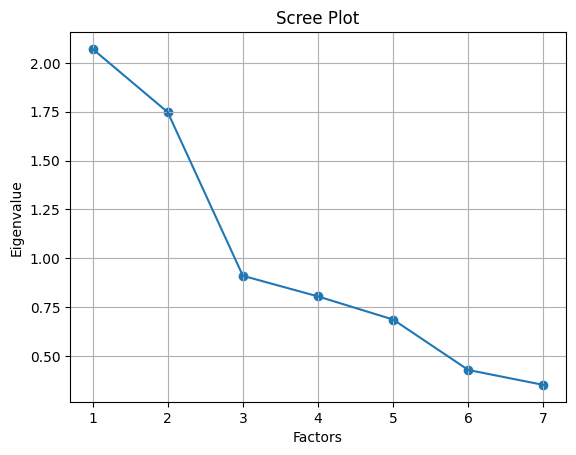

In [121]:
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

We can see that two eigen values are greater than 1.

In [133]:
fa2 = FactorAnalyzer(2, rotation=None)
fact_res2 = fa2.fit(df)
pd.DataFrame(
    fact_res2.get_uniquenesses(), index=[data.columns], columns=["uniquenesses"]
)

,uniquenesses
Microsoft,0.551609
Samsung,0.736050
SnP500,0.170959
GDP,0.244268
UR_Rate,0.590612
Personal_Saving,0.889993
Maturity_Yield,0.910549


the uniqueness values for the variables are as follows: Microsoft has a uniqueness value of 0.551609, indicating that about 55% of its variance is unique to Microsoft and not explained by the factors. Samsung has a higher uniqueness value of 0.736050, meaning around 74% of its variance is unique. On the other hand, the S&P 500 index shows a low uniqueness value of 0.170959, suggesting that only about 17% of its variance is unique, with the rest being explained by the common factors. Similarly, GDP has a uniqueness value of 0.244268, indicating that approximately 24% of its variance is unique.

In [136]:
pd.DataFrame(
    fact_res2.get_factor_variance(),
    index=["Sum of squared loadings", "Proportional variance", "Cumulative variance"],
    columns=["Factor 1", "Factor 2"],
)

,Factor 1,Factor 2
Sum of squared loadings,1.656777,1.249184
Proportional variance,0.236682,0.178455
Cumulative variance,0.236682,0.415137


Proportional variance gives a ratio that indicates how much a factor explains the variance of all seven variables. For example, factor 1 explains 23.6% of the variance of the seven variables. Factor 2 explains 17% of the variance of the seven variables. Cumulative variance shows the cumulative ability of the factors to explain the variance of seven variables. For example, factor 1 and factor 2 combined explain 23% of the variance of seven variables. The 2-factor model explains a total of 41% of the variance of seven variables